# _***Simulacion partidos NBA***_

En el siguiente Notebook se analizaran los datos de las temporadas jugadas en el torneo de la NBA con una historia de datos desde el año 2003 hasta el 2019. Para hacer el analisis de los datos se tomaran en cuenta los equipos cuando juegan en condicion de local y en condicion de visitante, como primera instancia se tendra que hacer una limpieza de datos (_***Data Wrangling***_) para asi quitar reduncias valores nulos etc.

como paso siguiente se visualizaran los datos de acuerdo al analisis realizado para ver como es el flujo del puntaje y las asistencias obtenidas por los equipos cuando juegan en condicion de local y en condicion de visitante, luego se hara uso de los modelos de machine learning para asi predecir cual equipo tiene mas probabilidades de ganar si jugando como local o jugando como visitante.

Luego de hacer las predicciones se hara una simulacion de un partido entre Los Laker y los Raptor para ver cual equipo gana el partido, el que obtenga mas de 50% gana el partido.

Por ultimo se hara la misma simulacion del partido entre los Lakers y los Raptors pero la diferencia es que la funcion que ejecuta la simulacion recibira dos parametros los cuales seran los nombres de los equipos a los cuales se desea enfrentar en la simulacion dando como resultado el posible ganador del partido.

Para llevar a cabo este analisis se usaran 5 librerias:

+ `pandas:` Data Wrangling.

+ `numpy:` Para hacer calculos sobre el conjunto de datos.

+ `MatPloit y seaborn:` para hacer las visualizaciones del analisis del conjunto de datos.

+ `sklearn:` para hacer los modelos y predicciones del conjunto de datos.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

A continuacion se importan los conjuntos de datos que se usaran en este analisis para esto se usa la libreria pandas y el metodo _***.read_csv***_.

In [7]:
games = pd.read_csv("./DataSet/games.csv")
teams = pd.read_csv("./DataSet/teams.csv")
games_details = pd.read_csv("./DataSet/games_details.csv")
players = pd.read_csv("./DataSet/players.csv")
ranking = pd.read_csv("./DataSet/ranking.csv")

C:\Users\gbrlc\AppData\Local\Temp\ipykernel_86528\3322725549.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv("./DataSet/games_details.csv")


## 1. DATA WRANGLING

Como se observa en la linea de arriba sale una advertencia que dice que el conjunto de datos tiene tipos de datos combinados en 6 columnas, este problema se solucionara haciendo la limpieza de datos (_***Data Wrangling***_)

In [8]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


Se usa el metodo de pandas _***.info***_ que muestra la informacion del conjunto de datos _***games***_, en esta informacion se puede observar cada uno de los tipos de datos de los campos de cada columna, tambien se puede ver si los campos son nulos o no, se observa la cantidad de cada uno de los tipos datos existentes, total de columnas del conjunto de datos etc.


In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [10]:
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


Se usa el metodo _***.dropna()***_ para eliminar los datos con los campos donde falten valores.

In [11]:
games = games.dropna()
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26552 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26552 non-null  object 
 1   GAME_ID           26552 non-null  int64  
 2   GAME_STATUS_TEXT  26552 non-null  object 
 3   HOME_TEAM_ID      26552 non-null  int64  
 4   VISITOR_TEAM_ID   26552 non-null  int64  
 5   SEASON            26552 non-null  int64  
 6   TEAM_ID_home      26552 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26552 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float64
 17

Con el metodo _***.describe()***_ se muestra la descripcion detallada del conjunto de datos, en esta descripcion se observa el valor maximo y minimo, el promedio, la media y los cuartiles de cada uno de los campos de cada columna del DataFrame.


In [12]:
games.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.655200e+04,2.655200e+04,2.655200e+04,26552.000000,2.655200e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,2.655200e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000
mean,2.179758e+07,1.610613e+09,1.610613e+09,2012.147861,1.610613e+09,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,1.610613e+09,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.589221
std,5.536391e+06,8.641202e+00,8.659568e+00,5.569599,8.641202e+00,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,8.659568e+00,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.491984
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.070008e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120081e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.180007e+07,1.610613e+09,1.610613e+09,2017.000000,1.610613e+09,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,1.610613e+09,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,5.210021e+07,1.610613e+09,1.610613e+09,2022.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


##### _***EQUIPOS DE LA NBA CON MAS VICTORIAS***_


Para hacer el siguiente grafico de barras se utilizo la libreria _***seaborn***_ y muestra los datos de los equipos que mas obtuvieron victorias en las temporadas de la NBA comprendidas entre los años 2003 y 2019.

- Con el metodo _***.where***_ de la libreria _***numpy***_ seleccionamos los indices de cada uno de los datos alojados en los campos _***HOME_TEAM_WINS***_ y con estos buscara los indices de los valores de las columnas _***HOME_TEAM_WINS***_ y la columna _***VISITOR_TEAM_ID***_

- Al resultado del metodo _***.where***_ de _***numpy***_ le asignamos el metodo _***.DataFrame***_ para convertir la serie de datos en un DataFrame y asi poder trabajar sobre este conjunto de datos.

- Cuando creamos el DataFrame le aplicamos el metodo _***.merge***_ para combinar los dos conjuntos de datos y poder graficar sus datos y obtener un mejor entendimiento de estos.

- Por medio de la libreria _***seaborn***_ se grafica una visualizacion de barras que mostrara el resultado de los equipos con mas victorias en el rango de años de la data historica del DataFrame.


<Axes: ylabel='Number of wins'>

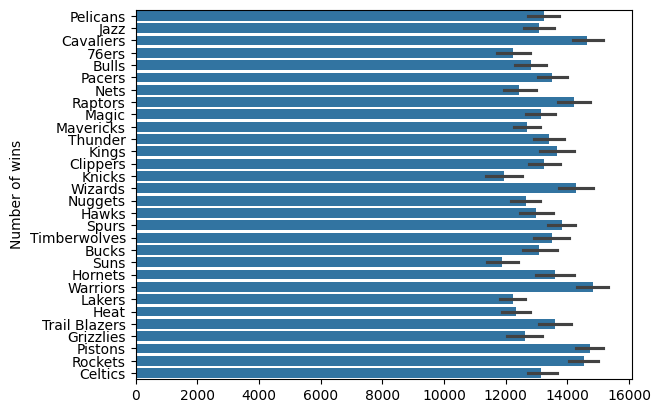

In [13]:
winning_teams = np.where(
    games["HOME_TEAM_WINS"] == 1, games["HOME_TEAM_ID"], games["VISITOR_TEAM_ID"]
)

winning_teams = pd.DataFrame(winning_teams, columns=["TEAM_ID"])

winning_teams = (
    winning_teams.merge(teams[["TEAM_ID", "NICKNAME"]], on="TEAM_ID")["NICKNAME"]
    .to_frame()
    .reset_index()
)

winning_teams.columns = ["TEAM NAME", "Number of wins"]

sns.color_palette("coolwarm", as_cmap=True)
sns.barplot(winning_teams["Number of wins"])

Se observa que las temporadas de la NBA año tras año varian mucho, Para entender mejor estos datos se mostraran los equipos que anotaron mas puntos como locales y los que anotaron mas puntos como visitantes, tambien se analizaran las asistencias obtenidas por cada equipo.

## _***1.1. Analisis univariado***_

Para ver los datos con mayor claridad se hara un analisis univariado de los campos de los puntos y las asistencias que obtuvieron los equipos jugando como visitantes y y como locales.

### _***Equipos con mayor numero de puntos en campo local***_

Para visualizar los datos mencionados anteriormente usamos las librerias _***MatPlotLib***_ y _***seaborn***_.

- Con el metodo _***.color_palette***_ de _***seaborn***_ le asignamos la paleta de colores a la visualizacion.

- Los datos se grafican en un histograma de la libreria _***MatPlotLib***_ que recibira los datos de los equipos que juegan de local, a este histograma se le asigna un label en el eje X y otro en el eje Y con el metodo _***.xlabel***_ y _***.ylabel***_.

Se hacen los mismos pasos para hacer la grafica que mostrara los datos de los equipos que anotaron mas puntos como visitantes.


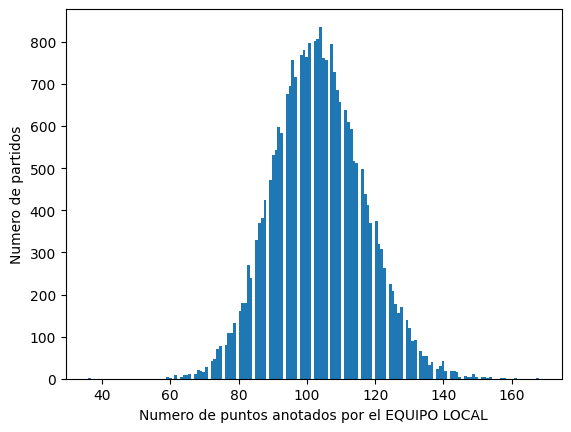

In [14]:
sns.color_palette("coolwarm", as_cmap=True)
plt.hist(games["PTS_home"], bins=int(np.sqrt(len(games["PTS_home"]))))
plt.xlabel("Numero de puntos anotados por el EQUIPO LOCAL")
plt.ylabel("Numero de partidos")
plt.show()

### _***Equipos con mayor numero de puntos en campo visitante***_.


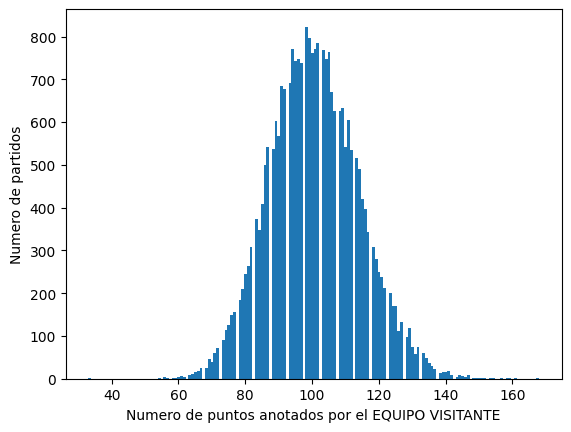

In [15]:
sns.color_palette("coolwarm", as_cmap=True)
plt.hist(games["PTS_away"], bins=int(np.sqrt(len(games["PTS_away"]))))
plt.xlabel("Numero de puntos anotados por el EQUIPO VISITANTE")
plt.ylabel("Numero de partidos")
plt.show()

- Con el metodo _***.mean***_ de la libreria _***numpy***_ se calcula el porcentaje de los puntos anotados por los equipos.

- Con el metodo _***.std***_ de la libreria _***numpy***_ se calcula la desviacion estandar de los datos de los puntos anotados por los equipos, Esta se utiliza para calcular la dispersión en la que los puntos de datos individuales difieren de la media.


In [16]:
mean_home_points = np.mean(games["PTS_home"])
std_home_points = np.std(games["PTS_home"])
print(
    "Promedio puntos equipos locales:",
    mean_home_points,
    "Dispercion puntos equipos locales:",
    std_home_points,
)

mean_away_points = np.mean(games["PTS_away"])
std_away_points = np.std(games["PTS_away"])
print(
    "Promedio Puntos equipos vistantes:",
    mean_away_points,
    "Dispercion puntos equipos visitantes:",
    std_away_points,
)

Promedio puntos equipos locales: 103.45589786080144 Dispercion puntos equipos locales: 13.283119392153075
Promedio Puntos equipos vistantes: 100.63987646881591 Dispercion puntos equipos visitantes: 13.435615411255492


Con estos datos se puede deducir que los equipos tienen mejor rendimiento jugando como locales.

### _***Equipos con mayor numero de asistencias en campo local***_

En la siguiente visualizacion se mostraran los equipos que tuvieron mayor numero de asistencias jugando como locales y jugando como visitantes. para visualizar estos datos se usa la libreria _***MatPlotLib***_ para hacer un histograma.

- La visualizacion recibira como parametro las asistencias obtenidas por los equipos que jugaron como locales.

- A este histograma se le asigna un label en el eje X y otro en el eje Y con el metodo _***.xlabel***_ y _***.ylabel***_.

Se hace el mismo proceso para visualizar los datos de de los equipos que obtuvieron mayor numero de asistencias jugando como visitantes


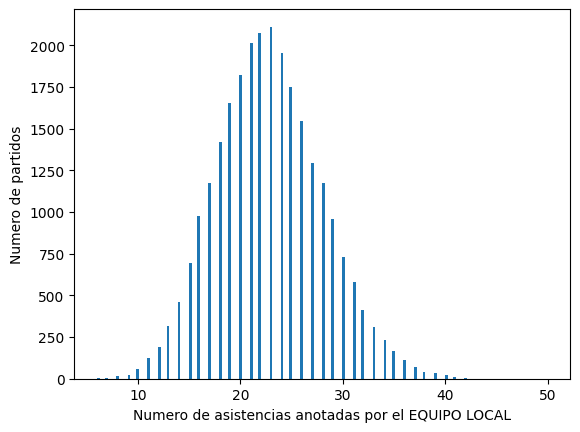

In [17]:
sns.color_palette("coolwarm", as_cmap=True)
plt.hist(games["AST_home"], bins=int(np.sqrt(len(games["AST_home"]))))
plt.xlabel("Numero de asistencias anotadas por el EQUIPO LOCAL")
plt.ylabel("Numero de partidos")
plt.show()

### _***Equipos con mayor numero de asistencias en campo visitante***_


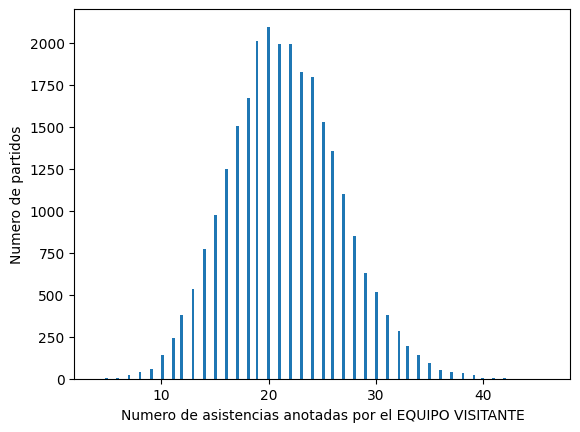

In [18]:
sns.color_palette("coolwarm", as_cmap=True)
plt.hist(games["AST_away"], bins=int(np.sqrt(len(games["AST_away"]))))
plt.xlabel("Numero de asistencias anotadas por el EQUIPO VISITANTE")
plt.ylabel("Numero de partidos")
plt.show()

- Con el metodo _***.mean***_ de la libreria _***numpy***_ se calcula el promedio de los equipos que obtuvieron mayor numero de asistencias.

- Con el metodo _***.std***_ de la libreria _***numpy***_ se calcula la desviacion estandar de los datos de los de los equipos que obtuvieron mayor numero de asistencias, Esta se utiliza para calcular la dispersión en la que los puntos de datos individuales difieren de la media.


In [19]:
mean_home_assists = np.mean(games["AST_home"])
std_home_assists = np.std(games["AST_home"])
print(
    "Promedio asistencias equipos locales:",
    mean_home_assists,
    "Dispercion Asistencias equipos locales:",
    std_home_assists,
)

mean_away_assists = np.mean(games["AST_away"])
std_away_assists = np.std(games["AST_away"])
print(
    "Promedio asistencias equipos vistantes:",
    mean_away_assists,
    "Dispercion Asistencias equipos visitantes:",
    std_away_assists,
)

Promedio asistencias equipos locales: 22.823440795420307 Dispercion Asistencias equipos locales: 5.193209935908628
Promedio asistencias equipos vistantes: 21.49627146730943 Dispercion Asistencias equipos visitantes: 5.160498849514307


Con estos datos se puede deducir que los equipos tienen mejor rendimiento jugando como locales.

### _***Equipos con mayor numero de rebotes en campo local***_

En la siguiente visualizacion se mostraran los equipos que tuvieron mayor numero de rebotes jugando como locales y jugando como visitantes. para visualizar estos datos se usa la libreria _***MatPlotLib***_ para hacer un histograma.

- la visualizacion recibira como parametro los rebotes obtenidos por los equipos que jugaron como locales.

- A este histograma se le asigna un label en el eje X y otro en el eje Y con el metodo _***.xlabel***_ y _***.ylabel***_.

Se hace el mismo proceso para visualizar los datos de de los equipos que obtuvieron mayor numero de rebotes jugando como visitantes.


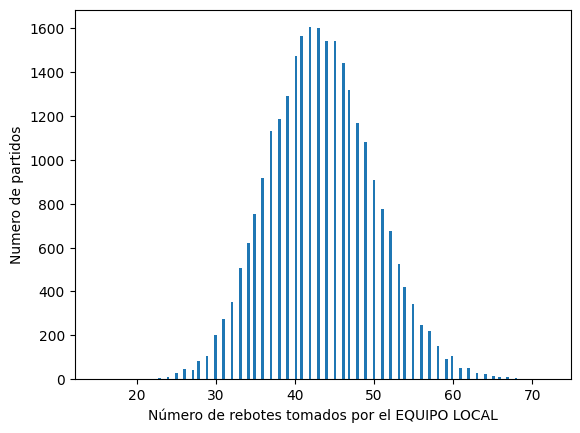

In [20]:
sns.color_palette("coolwarm", as_cmap=True)
plt.hist(games["REB_home"], bins=int(np.sqrt(len(games["REB_home"]))))
plt.xlabel("Número de rebotes tomados por el EQUIPO LOCAL")
plt.ylabel("Numero de partidos")
plt.show()

### _***Equipos con mayor numero de rebotes en campo visitante***_


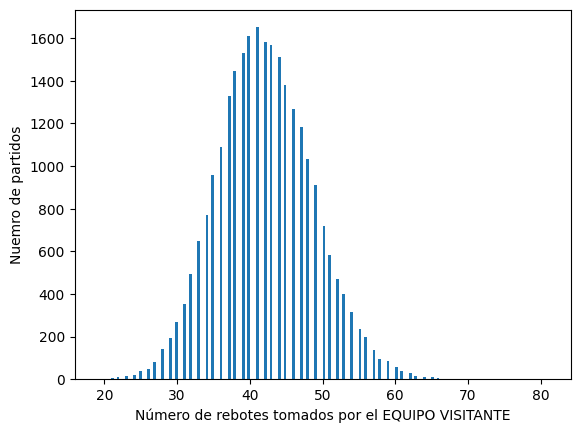

In [21]:
sns.color_palette("coolwarm", as_cmap=True)
plt.hist(games["REB_away"], bins=int(np.sqrt(len(games["REB_away"]))))
plt.xlabel("Número de rebotes tomados por el EQUIPO VISITANTE")
plt.ylabel("Nuemro de partidos")
plt.show()

- Con el metodo _***.mean***_ de la libreria _***numpy***_ se calcula el promedio de los rebotes anotados por los equipos.

- Con el metodo _***.std***_ de la libreria _***numpy***_ se calcula la desviacion estandar de los datos de los rebotes anotados por los equipos, Esta se utiliza para calcular la dispersión en la que los puntos de datos individuales difieren de la media


In [22]:
mean_home_reb = np.mean(games["REB_home"])
std_home_reb = np.std(games["REB_home"])
print(
    "Promedio rebotes equipos locales:",
    mean_home_reb,
    "Dispercion rebotes equipos locales:",
    std_home_reb,
)

mean_away_reb = np.mean(games["REB_away"])
std_away_reb = np.std(games["REB_away"])
print(
    "Promedio rebotes equipos visitantes:",
    mean_away_reb,
    "Dispercion Asistencias equipos vistantes:",
    std_away_reb,
)

Promedio rebotes equipos locales: 43.374284423018985 Dispercion rebotes equipos locales: 6.625643736181584
Promedio rebotes equipos visitantes: 42.113249472732754 Dispercion Asistencias equipos vistantes: 6.532915646920986


Con estos datos se puede deducir que los equipos tienen mejor rendimiento jugando como locales.

Se crea una funcion llamada _***distribution***_ que sirve para hacer una distribucion empirica de los datos, es decir, que iterara cada uno de los campos donde se encuentran los datos y los compara para ver si sus valores son menores o iguales a la medida del valor especificado.

Esta funcion sera invocada en las visualizaciones donde se requiera hacer la comparacion de los datos que necesiten una distribuicion empirica.


In [23]:
def distribution(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, 1 + n) / n
    return x, y

### _***1.2 DISTRIBUCION DE DATOS***_

#### _***Distribucion de datos de los puntos hechos por los equipos que juegan de locales***_

La funcion _***distribution***_ sera usada para poder analizar los datos de los puntos hechos por los equipos jugando como locales y visitantes, tambien sera usada en las visualizaciones que muestran las asistencias hechas por los equipos jugando de locales y de visitantes.

- Se crean 2 variables a las cuales se les asignara la invocacion de la funcion _***distribution***_ la cual recibira por parametro los puntos de los equipos que jugaron de locales.

- Se crean otras 2 variables a las cuales se les asigna la funcion _***distribution***_ que efectuaran el metodo _***.random***_ de la libreria _***numpy***_ que sirve para deducir los datos que no se pueden predecir logicamente, y como parametro se le pasan las variable del promedio y la variable de la dispercion de los equipos que jugan como locales.

- Para visualizar estos datos se usa el grafico de lineas de la libreria _***MatplotLib***_ la cual recibira los datos que se alojan en las variables creadas anteriormente.

Se efectuan los mismos pasos para visualizar los datos de los equipos que jugaron como visitantes.


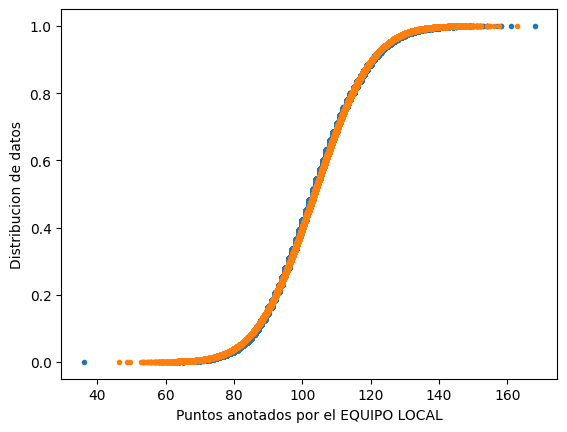

In [24]:
x_pts_home, y_pts_home = distribution(games["PTS_home"])
x_pts_home1, y_pts_home1 = distribution(
    np.random.normal(mean_home_points, std_home_points, size=100000)
)
sns.color_palette("coolwarm", as_cmap=True)
plt.plot(x_pts_home, y_pts_home, marker=".", linestyle="none")
plt.plot(x_pts_home1, y_pts_home1, marker=".", linestyle="none")
plt.xlabel("Puntos anotados por el EQUIPO LOCAL")
plt.ylabel("Distribucion de datos")
plt.show()

### _***Distribucion de datos de los puntos hechos por los equipos que juegan de visitantes***_


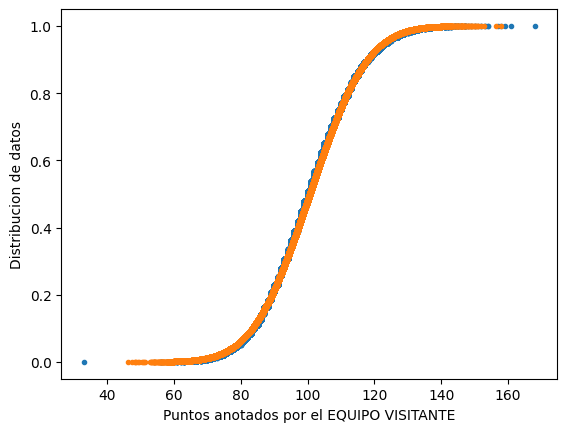

In [25]:
x_pts_away, y_pts_away = distribution(games["PTS_away"])
x_pts_away1, y_pts_away1 = distribution(
    np.random.normal(mean_away_points, std_away_points, size=100000)
)
sns.color_palette("coolwarm", as_cmap=True)
plt.plot(x_pts_away, y_pts_away, marker=".", linestyle="none")
plt.plot(x_pts_away1, y_pts_away1, marker=".", linestyle="none")
plt.xlabel("Puntos anotados por el EQUIPO VISITANTE")
plt.ylabel("Distribucion de datos")
plt.show()

### _***Distribucion de datos de las asistencias hechas por los equipos que juegan de locales***_

- Se crean 2 variables a las cuales se les asignara la invocacion de la funcion _***distribution***_ la cual recibira por parametro los asistencias de los equipos que jugaron de locales.

- Se crean otras 2 variables a las cuales se les asigna la funcion _***distribution***_ que efectuaran el metodo _***.random***_ de la libreria _***numpy***_ que sirve para deducir los datos que no se pueden predecir logicamente, y como parametro se le pasan las variable del promedio y la variable de la dispercion de los equipos que jugan como locales.

- Para visualizar estos datos se usa el grafico de lineas de la libreria _***MatplotLib***_ la cual recibira los datos que se alojan en las variables creadas anteriormente.

Se efectuan los mismos pasos para visualizar los datos de los equipos que jugaron como visitantes.


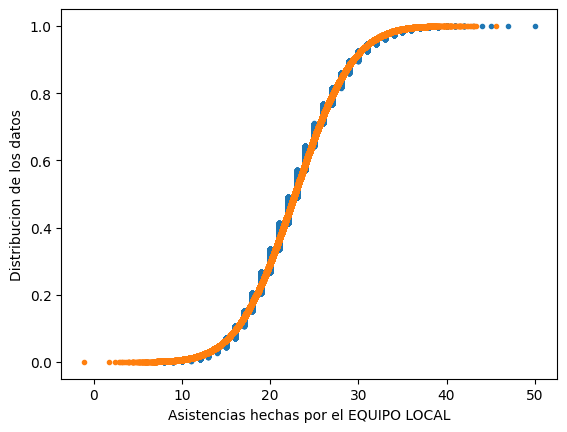

In [26]:
x_asth, y_asth = distribution(games["AST_home"])
x_asth1, y_asth1 = distribution(
    np.random.normal(mean_home_assists, std_home_assists, size=100000)
)
sns.color_palette("coolwarm", as_cmap=True)
plt.plot(x_asth, y_asth, marker=".", linestyle="none")
plt.plot(x_asth1, y_asth1, marker=".", linestyle="none")
plt.xlabel("Asistencias hechas por el EQUIPO LOCAL")
plt.ylabel("Distribucion de los datos")
plt.show()

### _***Distribucion de datos de las asistencias hechas por los equipos que juegan de visitantes***_


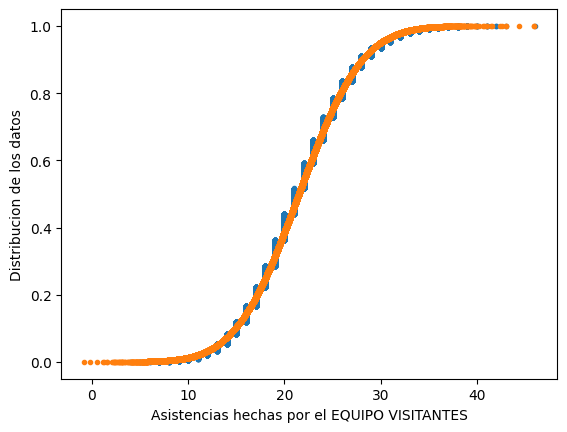

In [27]:
x_asta, y_asta = distribution(games["AST_away"])
x_asta1, y_asta1 = distribution(
    np.random.normal(mean_away_assists, std_away_assists, size=100000)
)
sns.color_palette("coolwarm", as_cmap=True)
plt.plot(x_asta, y_asta, marker=".", linestyle="none")
plt.plot(x_asta1, y_asta1, marker=".", linestyle="none")
plt.xlabel("Asistencias hechas por el EQUIPO VISITANTES")
plt.ylabel("Distribucion de los datos")
plt.show()

### _***Distribucion de los datos de los rebotes hechos por los equipos que juegan de locales***_

- Se crean 2 variables a las cuales se les asignara la invocacion de la funcion _***distribution***_ la cual recibira por parametro los rebotes hechos por los equipos que jugaron de locales.

- Se crean otras 2 variables a las cuales se les asigna la funcion _***distribution***_ que efectuaran el metodo _***.random***_ de la libreria _***numpy***_ que sirve para deducir los datos que no se pueden predecir logicamente, y como parametro se le pasan las variable del promedio y la variable de la dispercion de los equipos que jugan como locales.

- Para visualizar estos datos se usa el grafico de lineas de la libreria _***MatplotLib***_ la cual recibira los datos que se alojan en las variables creadas anteriormente.

Se efectuan los mismos pasos para visualizar los datos de los equipos que jugaron como visitantes.


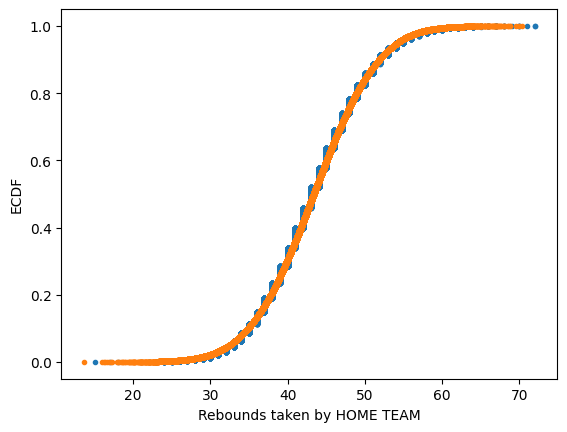

In [28]:
x_rebh, y_rebh = distribution(games["REB_home"])
x_rebh1, y_rebh1 = distribution(
    np.random.normal(mean_home_reb, std_home_reb, size=100000)
)
sns.color_palette("coolwarm", as_cmap=True)
plt.plot(x_rebh, y_rebh, marker=".", linestyle="none")
plt.plot(x_rebh1, y_rebh1, marker=".", linestyle="none")
plt.xlabel("Rebounds taken by HOME TEAM")
plt.ylabel("ECDF")
plt.show()

### _***Distribucion de los datos de los rebotes hechos por los equipos que juegan de visitantes***_


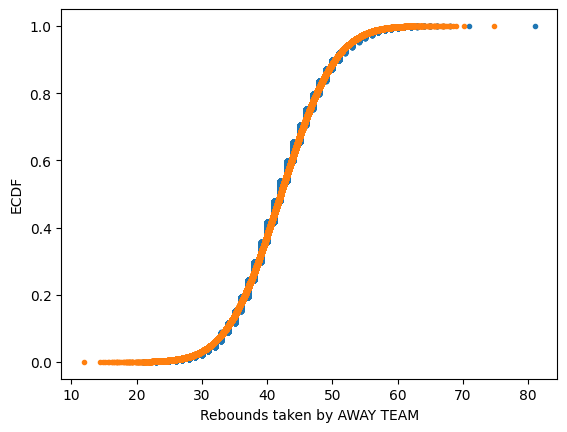

In [29]:
x_reba, y_reba = distribution(games["REB_away"])
x_reba1, y_reba1 = distribution(
    np.random.normal(mean_away_reb, std_away_reb, size=100000)
)
sns.color_palette("coolwarm", as_cmap=True)
plt.plot(x_reba, y_reba, marker=".", linestyle="none")
plt.plot(x_reba1, y_reba1, marker=".", linestyle="none")
plt.xlabel("Rebounds taken by AWAY TEAM")
plt.ylabel("ECDF")
plt.show()

Como se pudo ver en las visualizaciones anteriores las temporadas de la NBA cambian demasiado sus patrones cada año lo que hace muy dificil llegar a un analisis acertivo, por eso se tomaran los datos del lapso de la temporada del año 2019 del conjunto de datos con el que se viene trabajando.

- Se crea una lista y a esta se le asigna el rango de años de los cuales se requiere informacion, en este caso le asignaremos el ultimo año 2018-2019.

- Se crea una variable a la cual se le asigna la columna que contiene los datos de las temporadas del torneo de la NBA y a esta se le aplica el metodo _***.isin***_ de la libreria _***pandas***_ el cual indexa la columna que contiene los datos de las temporadas de la NBA con los datos de la columna que contiene los datos de los años de cada temporada.

- se crea una variable a la cual se le asignan los datos que contienen las columnas que se requiren usar para hacer el analisis.


In [30]:
years = [2018, 2019]
gamestt = games[games["SEASON"].isin(years)]
winner = gamestt["HOME_TEAM_WINS"]
gamestt = gamestt.drop(columns=["TEAM_ID_home", "TEAM_ID_away", "GAME_STATUS_TEXT"])
gamestt["PTS_home"] = (gamestt["PTS_home"]).astype(int)
gamestt["PTS_away"] = (gamestt["PTS_away"]).astype(int)
gamestt["AST_home"] = (gamestt["AST_home"]).astype(int)
gamestt["AST_away"] = (gamestt["AST_away"]).astype(int)
gamestt["REB_home"] = (gamestt["REB_home"]).astype(int)
gamestt["REB_away"] = (gamestt["REB_away"]).astype(int)
gamestt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2619 entries, 3180 to 21029
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAME_DATE_EST    2619 non-null   object 
 1   GAME_ID          2619 non-null   int64  
 2   HOME_TEAM_ID     2619 non-null   int64  
 3   VISITOR_TEAM_ID  2619 non-null   int64  
 4   SEASON           2619 non-null   int64  
 5   PTS_home         2619 non-null   int32  
 6   FG_PCT_home      2619 non-null   float64
 7   FT_PCT_home      2619 non-null   float64
 8   FG3_PCT_home     2619 non-null   float64
 9   AST_home         2619 non-null   int32  
 10  REB_home         2619 non-null   int32  
 11  PTS_away         2619 non-null   int32  
 12  FG_PCT_away      2619 non-null   float64
 13  FT_PCT_away      2619 non-null   float64
 14  FG3_PCT_away     2619 non-null   float64
 15  AST_away         2619 non-null   int32  
 16  REB_away         2619 non-null   int32  
 17  HOME_TEAM_WINS 

In [31]:
gamestt.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
3180,2020-10-11,41900406,1610612748,1610612747,2019,93,0.443,0.591,0.357,25,41,106,0.483,0.643,0.314,23,46,0
3181,2020-10-09,41900405,1610612747,1610612748,2019,108,0.463,0.857,0.368,21,41,111,0.458,0.955,0.424,26,35,0
3182,2020-10-06,41900404,1610612748,1610612747,2019,96,0.427,0.808,0.344,18,39,102,0.443,0.857,0.359,25,42,0
3183,2020-10-04,41900403,1610612748,1610612747,2019,115,0.513,0.913,0.353,25,37,104,0.430,0.759,0.333,23,43,1
3184,2020-10-02,41900402,1610612747,1610612748,2019,124,0.505,0.588,0.340,32,44,114,0.507,0.912,0.407,29,37,1


Los ID de los equipos aparecen como numeros, para un mejor entendimiento se va a intercambiar esa columna por la abreviacion de los equipos que se encuentra en el conjunto de datos _***team.csv***_ tomando esos datos por medio de los ID correspondientes, esto se logra mediante la relacion que tienen estos datos.

- Se crea una variable que sirve para obtener el index de los ID de los equipos el cual contiene la abreviacion de las regiones a las que pertenece cada equipo y esta informacion se convierte a formato _***diccionario***_ con el metodo _***.to_disc***_


In [32]:
abreviation = teams.set_index("TEAM_ID")["ABBREVIATION"].to_dict()
print(abreviation)

{1610612737: 'ATL', 1610612738: 'BOS', 1610612740: 'NOP', 1610612741: 'CHI', 1610612742: 'DAL', 1610612743: 'DEN', 1610612745: 'HOU', 1610612746: 'LAC', 1610612747: 'LAL', 1610612748: 'MIA', 1610612749: 'MIL', 1610612750: 'MIN', 1610612751: 'BKN', 1610612752: 'NYK', 1610612753: 'ORL', 1610612754: 'IND', 1610612755: 'PHI', 1610612756: 'PHX', 1610612757: 'POR', 1610612758: 'SAC', 1610612759: 'SAS', 1610612760: 'OKC', 1610612761: 'TOR', 1610612762: 'UTA', 1610612763: 'MEM', 1610612764: 'WAS', 1610612765: 'DET', 1610612766: 'CHA', 1610612739: 'CLE', 1610612744: 'GSW'}


- En la variable _***gamestt***_ creada anteriormente se remplaza el valor actual de la columna _***HOME_TEAM_ID***_ por el valor que contiene la variable _***abreviation***_ usando el metodo _***.replace***_

- En la variable _***gamestt***_ creada anteriormente se remplaza el valor actual de la columna _***VISITOR_TEAM_ID***_ por el valor que contiene la variable _***abreviation***_ usando el metodo _***.replace***_


In [33]:
gamestt["HOME_TEAM_ID"] = gamestt["HOME_TEAM_ID"].replace(abreviation)
gamestt["VISITOR_TEAM_ID"] = gamestt["VISITOR_TEAM_ID"].replace(abreviation)
gamestt.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
3180,2020-10-11,41900406,MIA,LAL,2019,93,0.443,0.591,0.357,25,41,106,0.483,0.643,0.314,23,46,0
3181,2020-10-09,41900405,LAL,MIA,2019,108,0.463,0.857,0.368,21,41,111,0.458,0.955,0.424,26,35,0
3182,2020-10-06,41900404,MIA,LAL,2019,96,0.427,0.808,0.344,18,39,102,0.443,0.857,0.359,25,42,0
3183,2020-10-04,41900403,MIA,LAL,2019,115,0.513,0.913,0.353,25,37,104,0.430,0.759,0.333,23,43,1
3184,2020-10-02,41900402,LAL,MIA,2019,124,0.505,0.588,0.340,32,44,114,0.507,0.912,0.407,29,37,1


- A los datos del campo _***GAME_DATE_EST***_ del conjunto de datos alojado en la variable _***gamestt***_ se convierten a datos de tipo fecha usando el metodo _***.to_datetime***_

- Se ordenan de menor a mayor los campos del conjunto de datos por medio del campo _***GAME_ID***_


In [34]:
gamestt["GAME_DATE_EST"] = pd.to_datetime(gamestt["GAME_DATE_EST"])
gamestts = gamestt.set_index(["GAME_ID"])
gamestts = gamestts.sort_index(axis=0)
gamestts

,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
GAME_ID,,,,,,,,,,,,,,,,,
11800002,2018-09-28,CHA,BOS,2018,104,0.382,0.641,0.306,17,65,97,0.346,0.727,0.191,12,56,1
11800003,2018-09-29,TOR,POR,2018,122,0.415,0.824,0.343,15,45,104,0.420,0.720,0.387,25,46,1
11800005,2018-09-29,GSW,MIN,2018,110,0.473,0.769,0.353,33,48,114,0.426,0.733,0.400,15,47,0
11800007,2018-09-30,SAS,MIA,2018,104,0.435,0.778,0.409,23,48,100,0.368,0.741,0.294,19,53,1
11800008,2018-09-30,BOS,CHA,2018,115,0.442,0.857,0.419,26,50,112,0.475,0.667,0.364,26,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41900403,2020-10-04,MIA,LAL,2019,115,0.513,0.913,0.353,25,37,104,0.430,0.759,0.333,23,43,1
41900404,2020-10-06,MIA,LAL,2019,96,0.427,0.808,0.344,18,39,102,0.443,0.857,0.359,25,42,0
41900405,2020-10-09,LAL,MIA,2019,108,0.463,0.857,0.368,21,41,111,0.458,0.955,0.424,26,35,0


### _***Puntos anotados como locales***_

Se grafica un diagrama de caja para visualizar los datos de los puntos anotados por los equipos que juegan de local para esto usamos 2 librerias que nos ayudaran a hacer esta grafica _***MatPlotLib***_ y _***seaborn***_.

- con el metodo _***.set_size_inches***_ le asignamos las dimensiones a la visualizacion del diagrama tipo caja.

- en cada una de las cajas recibira los datos de los campos del conjunto de datos _***HOME_TEAM_ID***_ y _***PTS_home***_.

- Se le asignan los label que apareceran en el eje X y en el eje Y del diagrama de cajas.

- Se le asignan las posiciones a las cajas del diagrama con el metodo _***.xticks***_

Se hace el mismo proceso con la visualizacion de los puntos anotados por el equipo visitante


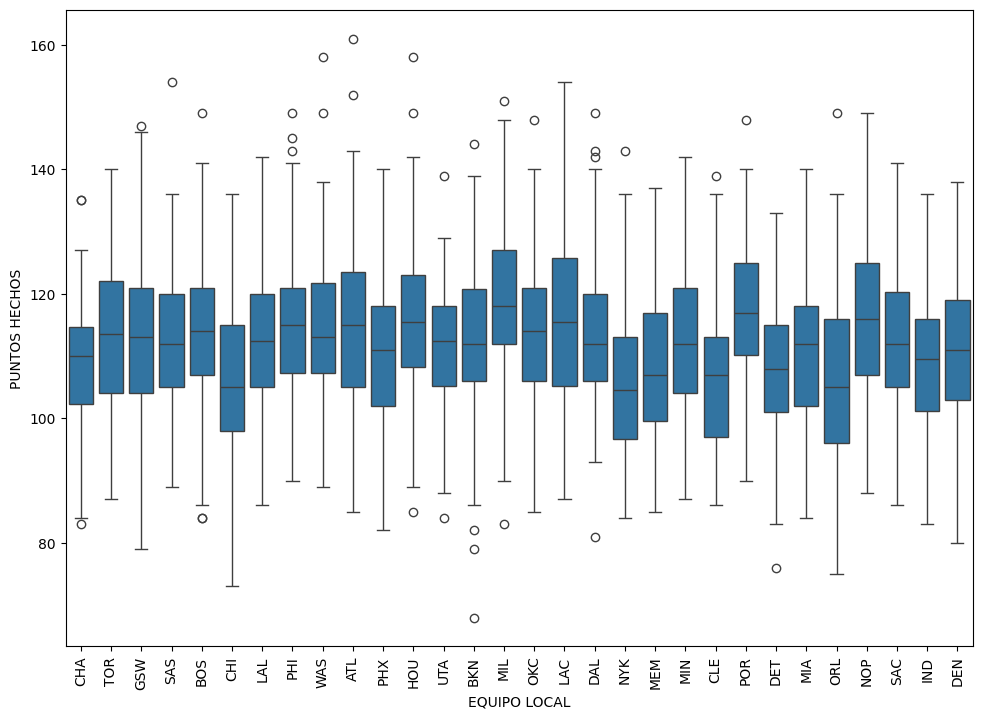

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(x="HOME_TEAM_ID", y="PTS_home", data=gamestts)
plt.xlabel("EQUIPO LOCAL")
plt.xticks(rotation=90)
plt.ylabel("PUNTOS HECHOS")
plt.show()

### _***Puntos anotados como visitantes***_


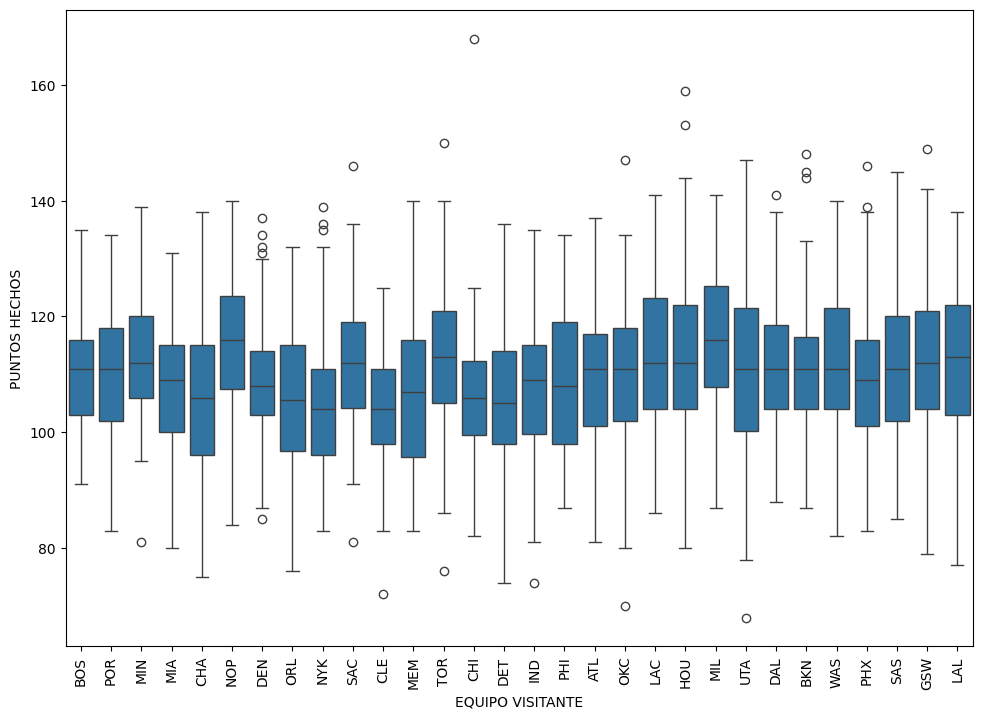

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(x="VISITOR_TEAM_ID", y="PTS_away", data=gamestts)
plt.xlabel("EQUIPO VISITANTE")
plt.xticks(rotation=90)
plt.ylabel("PUNTOS HECHOS")
plt.show()

### _***Asistencias obtenidas como locales***_

Se grafica un diagrama de caja para visualizar los datos de las asistencias obtenidas por los equipos que juegan de local para esto usamos 2 librerias que nos ayudaran a hacer esta grafica _***MatPlotLib***_ y _***seaborn***_.

- con el metodo _***.set_size_inches***_ le asignamos las dimensiones a la visualizacion del diagrama tipo caja.

- en cada una de las cajas recibira los datos de los campos del conjunto de datos _***HOME_TEAM_ID***_ y _***AST_home***_.

- Se le asignan los label que apareceran en el eje X y en el eje Y del diagrama de cajas.

- Se le asignan las posiciones a las cajas del diagrama con el metodo _***.xticks***_

Se hace el mismo proceso con la visualizacion de las asistencias obtenidas por el equipo visitante


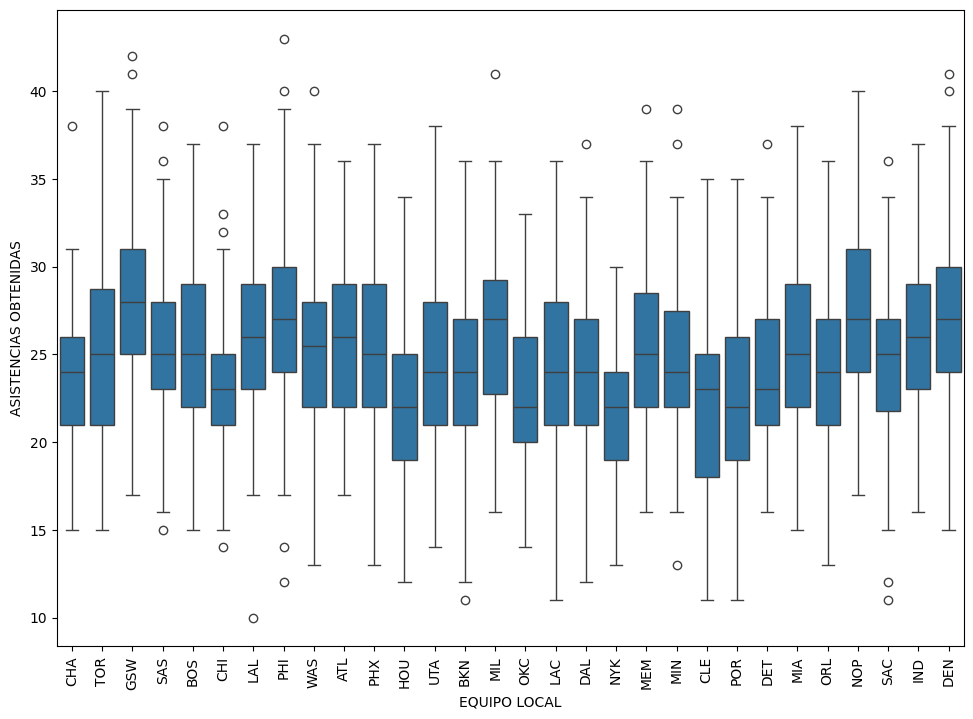

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(x="HOME_TEAM_ID", y="AST_home", data=gamestts)
plt.xlabel("EQUIPO LOCAL")
plt.xticks(rotation=90)
plt.ylabel("ASISTENCIAS OBTENIDAS")
plt.show()

### _***Asistencias obtenidas como visitantes***_


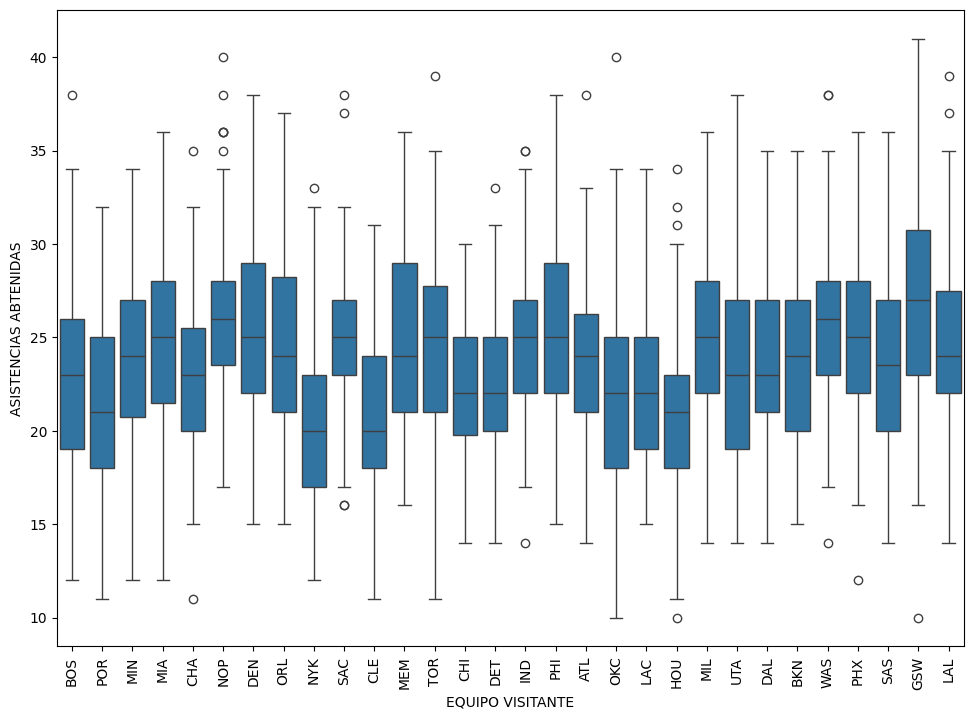

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(x="VISITOR_TEAM_ID", y="AST_away", data=gamestts)
plt.xlabel("EQUIPO VISITANTE")
plt.xticks(rotation=90)
plt.ylabel("ASISTENCIAS ABTENIDAS")
plt.show()

### _***Rebotes obtenidos como locales***_

Se grafica un diagrama de caja para visualizar los datos de los rebotes obtenidos por los equipos que juegan de local para esto usamos 2 librerias que nos ayudaran a hacer esta grafica _***MatPlotLib***_ y _***seaborn***_.

- con el metodo _***.set_size_inches***_ le asignamos las dimensiones a la visualizacion del diagrama tipo caja.

- en cada una de las cajas recibira los datos de los campos del conjunto de datos _***HOME_TEAM_ID***_ y _***REB_home***_.

- Se le asignan los label que apareceran en el eje X y en el eje Y del diagrama de cajas.

- Se le asignan las posiciones a las cajas del diagrama con el metodo _***.xticks***_

Se hace el mismo proceso con la visualizacion de los rebotes obtenidos por el equipo visitante


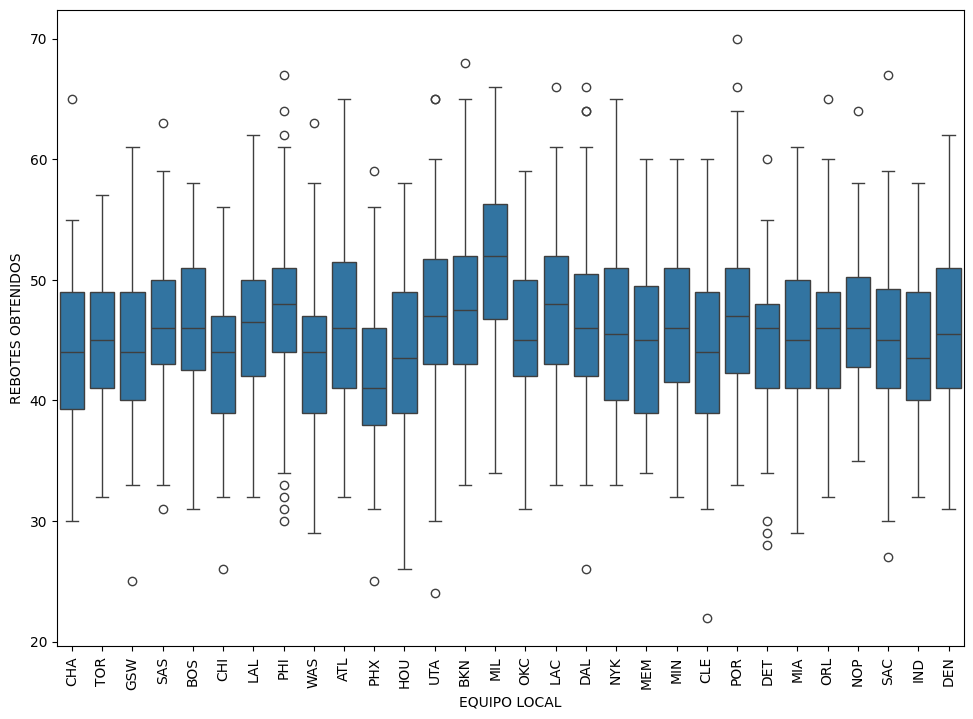

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(x="HOME_TEAM_ID", y="REB_home", data=gamestts)
plt.xlabel("EQUIPO LOCAL")
plt.xticks(rotation=90)
plt.ylabel("REBOTES OBTENIDOS")
plt.show()

### _***Rebotes obtenidos como visitante***_


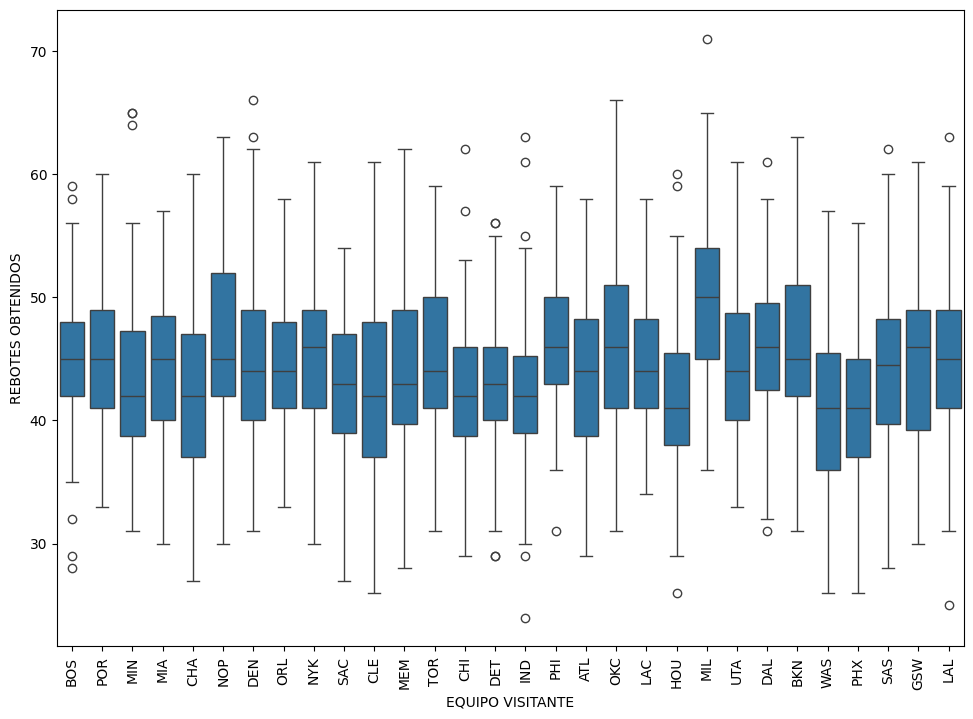

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(x="VISITOR_TEAM_ID", y="REB_away", data=gamestts)
plt.xlabel("EQUIPO VISITANTE")
plt.xticks(rotation=90)
plt.ylabel("REBOTES OBTENIDOS")
plt.show()

## _***2. MMACHINE LEARNING***_

A continuacion se obtendran las relaciones entre los puntos y las asistencias anotadas.

- Se crea una funcion que calcula la matriz de correlacion, para eso le pasamos 2 parametros a esta funcion _***(x, y)***_ y se crea una variable a la cual se le asignara el metodo de numpy ._***.corrcoef***_ que servira para averiguar el coeficiente de relacion.

- Se retorna el valor de esta variable en una lista _***[0, 1]***_


In [41]:
def matriz_correlacion(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

### _***2.1 Comparacion de los puntos y asistencias obtenidos por los equipos locales***_

Para graficar la siguiente visualizacion se hace uso de 2 librerias de graficos _***MatPlotLib***_ y _***seaborn***_

+ Para viasulizar los datos se hace una grafica de puntos para ver el comportamiento de los datos.

+ A la grafica se le asigna en el eje X los puntos obtenidos por los equipos que juegan en condicion de local y en el eje Y se le saginan los datos de las asistencias obtenidas por los equipos jugando en condicion de local

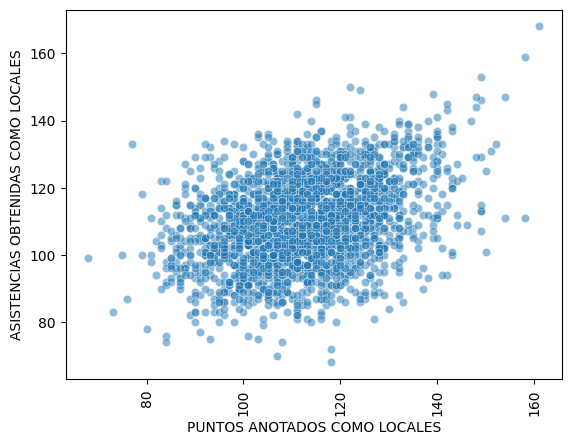

In [159]:
sns.color_palette("coolwarm", as_cmap=True)
sns.scatterplot(x="PTS_home", y="PTS_away", data=gamestts, alpha=0.5)
plt.xlabel("PUNTOS ANOTADOS COMO LOCALES")
plt.xticks(rotation=90)
plt.ylabel("ASISTENCIAS OBTENIDAS COMO LOCALES")
plt.show()

### _***Modelo de regresion lineal simple***_

En este modelo se haran las predicciones para ver cual es el porcentaje de las posiblidades que los equipos ganen en condicion de local analizando los puntos anotados y las asistencias obtenidas.

+ se crean dos variables, a la variable X se le asignaran los datos de los Puntos anotados por los equipos que juegan en condicion de local y a la variable Y se le asigna los datos de las asistencias obtenidas en condicion de local.

+ se crean las variables que serviran para entrenar el modelo; 2 variables de entrenamiento y 2 de testeo. A las variables de entrenamiento se le asignan ek 80% de los datos y las variables de testeo se le asigna el 20% restante.

In [169]:
x = gamestt["PTS_home"].values.reshape(-1, 1)
y = gamestt["AST_home"].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(x_train.shape)
print(x_test.shape)

(2095, 1)
(524, 1)


+ Se crea una instancia del modelo de regresion de la libreria _***sklearn***_ para obtener todos sus metodos.

+ se hace el entrenamiento del modelo usando el metodo _***.fit***_ que se invoca por medio de la instancia del modelo de regresion lineal.

In [170]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

+ Se crea una variable a la cual se le asignan los datos de las predicciones usando el metodo _***.predict***_ que se invoca por medio de la instancia del modelo y a este metodo se le pasa por parametro la variable que se requiere predecir en este caso la variable de testeo _***x_test***_.

+ se hace un print de los datos obtenidos con la prediccion y tambien de los datos reales.

In [171]:
y_pred = lin_reg.predict(x_test)
print("Predicciones: {}, Reales: {}".format(y_pred[:4], y_test[:4]))

Predicciones: [23.89408205 26.53722298 27.6385317  28.51957867], Reales: [28 28 27 28]


+ para mirar cual es la acertividad de la prediccion hecha, se usaran las metricas _***R2***_ y _***RMSE***_ haciendo uso de la libreria _***sklearn***_.

+ `RMSE:` con el metodo _***root_mean_squared_error***_ de _***sklearn***_ se comparan las variables de testeo con las predicciones hechas.

+ `R2:` con el metodo _***r2_score***_ de _***sklearn***_ se comparan las variables de testeo con las predicciones hechas.

In [172]:
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", rmse)
print("R2: ", r2_score(y_test, y_pred))

RMSE:  4.270682527499134
R2:  0.27075116015001865


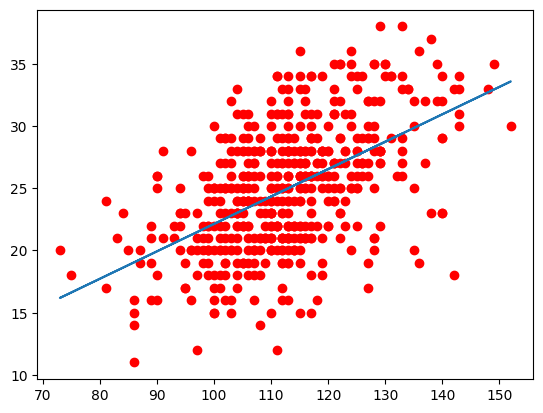

In [173]:
plt.plot(x_test, y_test, "ro")
plt.plot(x_test, y_pred)
plt.show()

su usara el mismo modelo de datos pero esta vez se compararan los mismos datos pero del equipo que juega en condicion de visitante para asi llegar a una conclucion sobre el comportamiento de estos datos.

Se hace el mismo proceso anterior.

### _***2.2 Comparacion de los puntos y asistencias obtenidos como visitantes***_


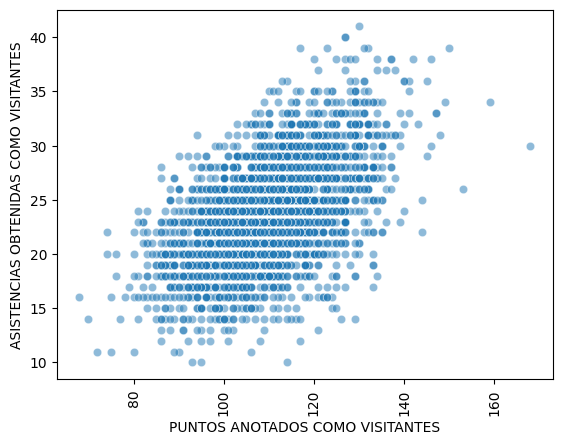

In [48]:
sns.color_palette("coolwarm", as_cmap=True)
sns.scatterplot(x="PTS_away", y="AST_away", data=gamestts, alpha=0.5)
plt.xlabel("PUNTOS ANOTADOS COMO VISITANTES")
plt.xticks(rotation=90)
plt.ylabel("ASISTENCIAS OBTENIDAS COMO VISITANTES")
plt.show()

Una vez se muestran los graficos del comportamiento de los datos tanto para el equipo visitante como los del equipo local, se calcula el coeficiente de relacion para calcular el porcentaje de de los datos existentes en cada campo de datos y esto dira como tienen mejor rendimiento los equipos si jugando de locales o jugando de visitantes. 

- Se muestran los valores de los coeficientes de relacion de las comparaciones entre los campos _***PTS_home***_ y _***AST_home***_

- Se muestran los valores de los coeficientes de relacion de las comparaciones entre los campos _***PTS_away***_ y _***AST_away***_


In [49]:
print(
    "Coeficiente de relacion del equipo local:",
    matriz_correlacion(gamestts["PTS_home"], gamestts["AST_home"]),
)
print(
    "Coeficiente de relacion del equipo visitante:",
    matriz_correlacion(gamestts["PTS_away"], gamestts["AST_away"]),
)

Coeficiente de relacion del equipo local: 0.5544092158457142
Coeficiente de relacion del equipo visitante: 0.5358877764489928


Teniendo los calculos del coeficiente de relacion de los juegos en condicion de local y de visitante se puede deducir que los equipos que juegan de local tienen mejor rendimiento.

A continuacion se hara la prediccion para saber que probabilidades tiene de ganar el partido los equipos que juegan como vistantes.

In [174]:
x = gamestt["PTS_away"].values.reshape(-1, 1)
y = gamestt["AST_away"].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(x_train.shape)
print(x_test.shape)

(2095, 1)
(524, 1)


In [175]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [176]:
y_pred = lin_reg.predict(x_test)
print("Predicciones: {}, Reales: {}".format(y_pred[:4], y_test[:4]))

Predicciones: [27.72502473 28.36585653 22.38475973 27.51141413], Reales: [27 30 19 21]


In [177]:
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", rmse)
print("R2: ", r2_score(y_test, y_pred))

RMSE:  4.019135914546839
R2:  0.2961078159966194


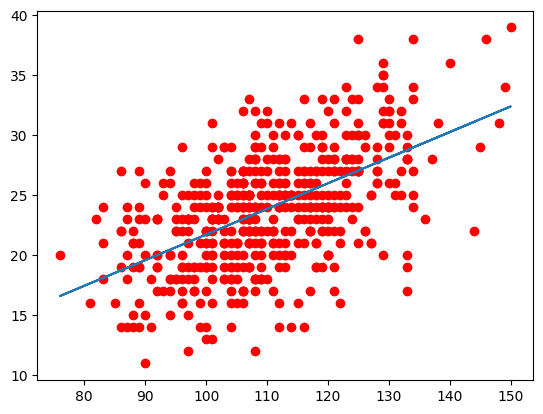

In [178]:
plt.plot(x_test, y_test, "ro")
plt.plot(x_test, y_pred)
plt.show()

Al comparar los datos generados por los equipos que jugan en condicion de local y los equipos que juegan en condicion de visitante se puede ver que tiene mas probabilidades de ganar los partidos los equipos que juegan en condicion local aunque es una minima diferencia ya que si miramos los calculos del coeficiente de relacion son de 53% y 55% y las predicciones nos dan mas o menos el mismo reango de dispercion en su acertividad.

In [55]:
team_list = teams["ABBREVIATION"]
results_dic = {}

for i in team_list:
    results_dic[str(i)] = []

for i in range(len(gamestts)):
    for j in team_list:
        if (gamestts.iloc[i, 1]) == j:
            results_dic[j].append(gamestts.iloc[i, :])
        elif (gamestts.iloc[i, 2]) == j:
            results_dic[j].append(gamestts.iloc[i, :])

results = {}
for i in team_list:
    results[i] = pd.DataFrame(results_dic[i])
results["LAL"]

,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
11800010,2018-09-30,LAL,DEN,2018,107,0.460,0.731,0.320,26,37,124,0.460,0.886,0.351,25,50,0
11800020,2018-10-02,LAL,DEN,2018,111,0.512,0.789,0.345,28,38,113,0.476,0.636,0.353,29,40,0
11800027,2018-10-04,LAL,SAC,2018,128,0.526,0.727,0.300,19,48,123,0.455,0.714,0.419,27,41,1
11800042,2018-10-06,LAL,LAC,2018,87,0.385,0.636,0.167,24,48,103,0.411,0.793,0.286,16,58,0
11800065,2018-10-10,LAL,GSW,2018,123,0.433,0.826,0.304,28,45,113,0.438,0.556,0.391,23,56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41900402,2020-10-02,LAL,MIA,2019,124,0.505,0.588,0.340,32,44,114,0.507,0.912,0.407,29,37,1
41900403,2020-10-04,MIA,LAL,2019,115,0.513,0.913,0.353,25,37,104,0.430,0.759,0.333,23,43,1
41900404,2020-10-06,MIA,LAL,2019,96,0.427,0.808,0.344,18,39,102,0.443,0.857,0.359,25,42,0
41900405,2020-10-09,LAL,MIA,2019,108,0.463,0.857,0.368,21,41,111,0.458,0.955,0.424,26,35,0


Se hace la grafica para visualizar la relacion entre HOME_TEAM_WINS y PUNTOS, ASISTENCIAS y REBOTES anotados por cada equipo.

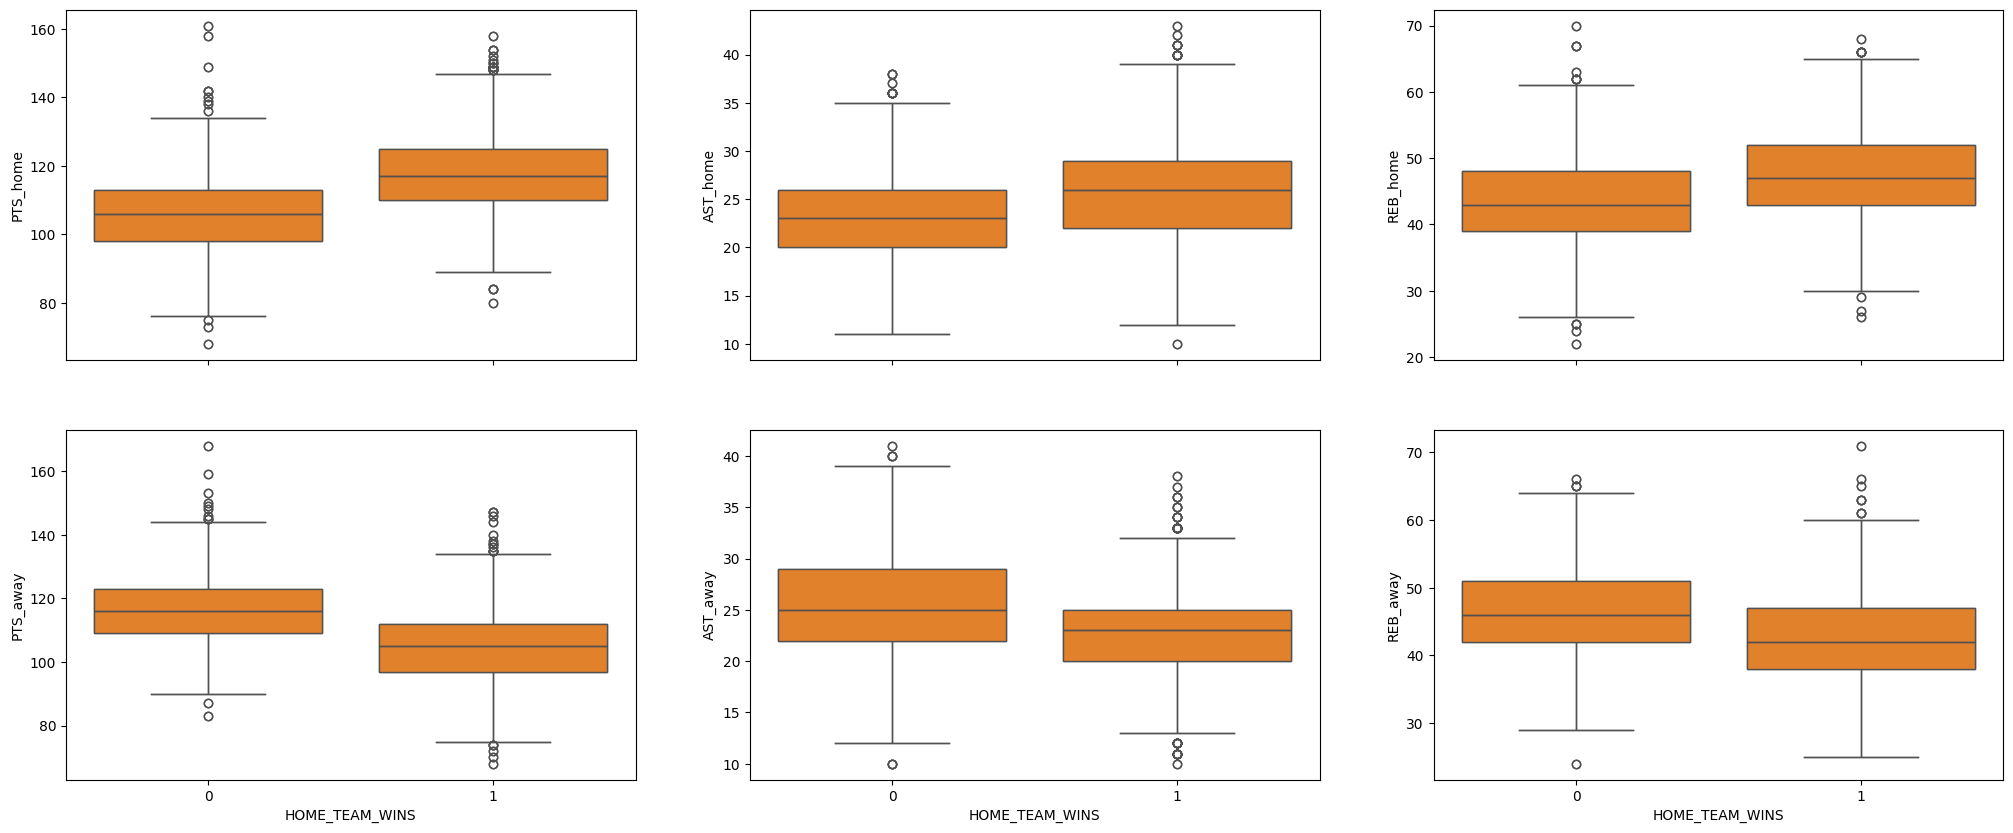

In [56]:
sns.color_palette("coolwarm", as_cmap=True)
plot_list = ["PTS_home", "AST_home", "REB_home", "PTS_away", "AST_away", "REB_away"]
fig, axes = plt.subplots(2, 3, figsize=(25, 10), sharex=True)
for j in range(2):
    for i, ax in enumerate(axes.flat):
        sns.boxplot(x="HOME_TEAM_WINS", y=plot_list[i], data=gamestts, ax=ax)

In [57]:
for i in range(6):
    print(
        "coeficiente de relacion entre HOME_TEAM_WINS y",
        plot_list[i],
        "es:",
        matriz_correlacion(gamestts["HOME_TEAM_WINS"], gamestts[plot_list[i]]),
    )
print(
    "Promedio de veces que gano el EQUIPO LOCAL entre 2016 y 2018:",
    np.mean(gamestts["HOME_TEAM_WINS"]),
)

coeficiente de relacion entre HOME_TEAM_WINS y PTS_home es: 0.4620833075161076
coeficiente de relacion entre HOME_TEAM_WINS y AST_home es: 0.27051914269455113
coeficiente de relacion entre HOME_TEAM_WINS y REB_home es: 0.29475116049960887
coeficiente de relacion entre HOME_TEAM_WINS y PTS_away es: -0.4483873203245307
coeficiente de relacion entre HOME_TEAM_WINS y AST_away es: -0.28973754281557795
coeficiente de relacion entre HOME_TEAM_WINS y REB_away es: -0.3094531837156623
Promedio de veces que gano el EQUIPO LOCAL entre 2016 y 2018: 0.563573883161512


Se crean 2 diccionarios vacios que me recibiran la informacion generada en las iteraciones del ciclo for donde se hallaran los resultados obtenidos por los equipos que jugaron en condicion de local y los equipos que jugaron en condicion de visitante.

In [58]:
results_home = {}
results_away = {}

for i in team_list:
    results_home[str(i)] = []
    results_away[str(i)] = []

for i in team_list:
    for j in range(len(results[i])):
        if results[i].iloc[j, 1] == i:
            results_home[i].append(results[i].iloc[j, :])
        elif results[i].iloc[j, 2] == i:
            results_away[i].append(results[i].iloc[j, :])

Mediante otro ciclo for se le asignan a los diccionarios vacios creados con anterioridad los resultados de las iteraciones alojados en las variables que sirvieron para calcular los datos que van a se usados para la simulacion de los partidos, este ciclo for iterara cada uno de los items de esta lista y los asignara en formato de DataFrame para poder hacer la simulacion de los partidos

In [59]:
results_homedf = {}
results_awaydf = {}

for i in team_list:
    results_homedf[i] = pd.DataFrame(results_home[i])
    results_awaydf[i] = pd.DataFrame(results_away[i])

### _***3. SIMULACION DE PARTIDOS***_

Se analizara un enfrentamiento entre 2 equipos (Los Angeles Lakers y Toronto Raptors) 

Se analizara el comportamiento de los datos de Los Angeles Lakers en los partidos como local. Cuántos puntos, asistencias y rebotes consiguen y conceden. Lo mismo se hará con los Toronto Raptors pero analizando sus partidos como visitante.

### _***Los Angeles Lakers Puntos anotados como local y como visitante***_

Para graficar estos datos en una visualizacion de caja se usaran una libreria _***Seaborn***_, y se le pasaran los datos de los puntos hechos en condicion de local y en condicion de visitante y por otro lado se le pasaran los datos que contienen los diccionarios que se crearon anteriormente.

<Axes: ylabel='PTS_away'>

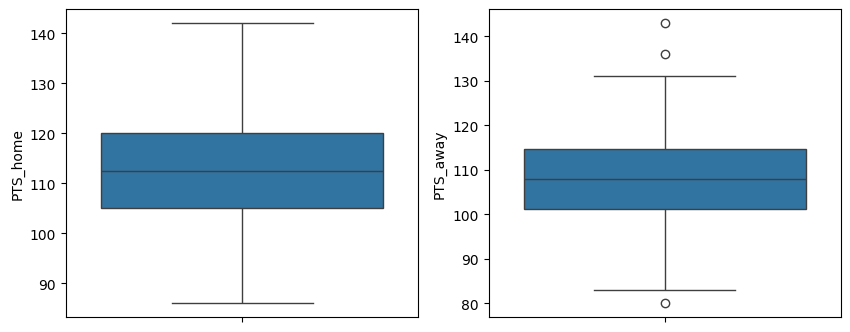

In [60]:
sns.color_palette("coolwarm", as_cmap=True)
fig, axes =plt.subplots(1,2, figsize=(10,4), sharex=True)
sns.boxplot( y="PTS_home", data=results_homedf["LAL"], ax=axes[0])
sns.boxplot( y="PTS_away", data=results_homedf["LAL"], ax=axes[1])

### _***Los Angeles Lakers asistencias obtenidas como local y como visitante***_

<Axes: ylabel='AST_away'>

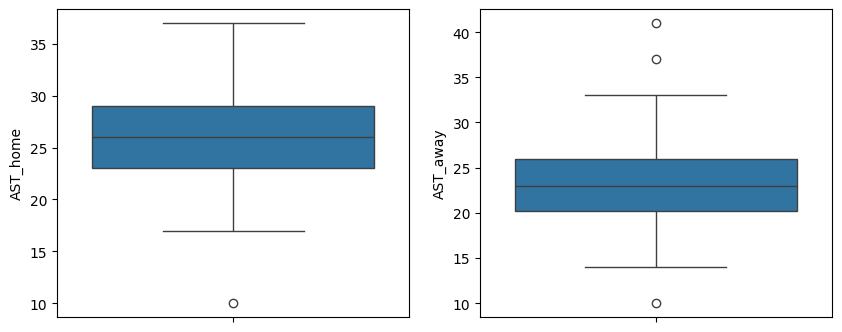

In [61]:
sns.color_palette("coolwarm", as_cmap=True)
fig, axes =plt.subplots(1,2, figsize=(10,4), sharex=True)
sns.boxplot( y="AST_home", data=results_homedf["LAL"], ax=axes[0])
sns.boxplot( y="AST_away", data=results_homedf["LAL"], ax=axes[1])

### _***Los Angeles Lakers rebotes obtenidos como local y como visitante***_

<Axes: ylabel='REB_away'>

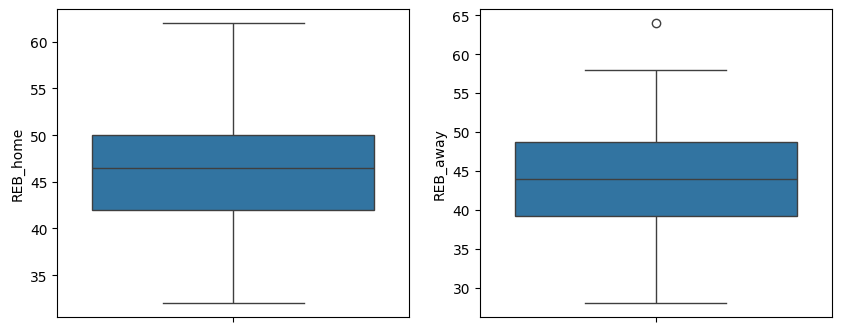

In [62]:
sns.color_palette("coolwarm", as_cmap=True)
fig, axes =plt.subplots(1,2, figsize=(10,4), sharex=True)
sns.boxplot(y="REB_home", data=results_homedf["LAL"], ax=axes[0])
sns.boxplot(y="REB_away", data=results_homedf["LAL"], ax=axes[1])

### _***Toronto Raptors puntos anotados como local y como visitante***_

<Axes: ylabel='PTS_away'>

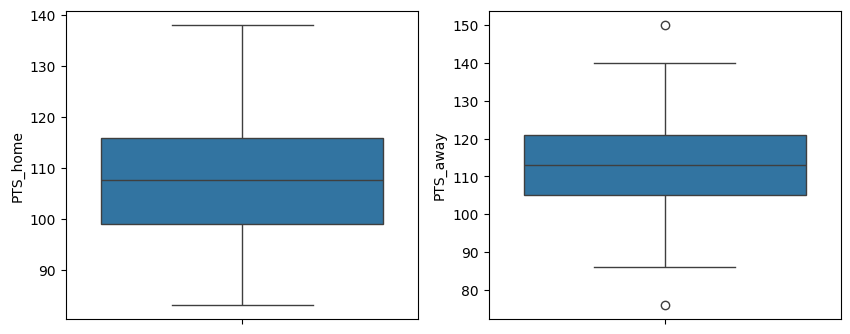

In [63]:
sns.color_palette("coolwarm", as_cmap=True)
fig, axes =plt.subplots(1,2, figsize=(10,4), sharex=True)
sns.boxplot( y="PTS_home", data=results_awaydf["TOR"], ax=axes[0])
sns.boxplot( y="PTS_away", data=results_awaydf["TOR"], ax=axes[1])

### _***Toronto Raptors asistencias obtenidas como local y como visitante***_

<Axes: ylabel='AST_away'>

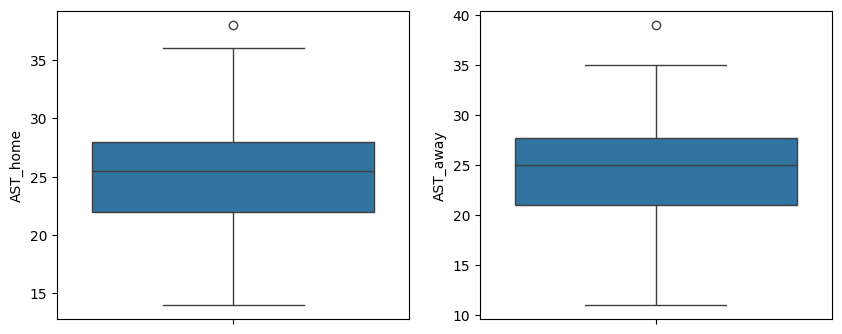

In [64]:
sns.color_palette("coolwarm", as_cmap=True)
fig, axes =plt.subplots(1,2, figsize=(10,4), sharex=True)
sns.boxplot( y="AST_home", data=results_awaydf["TOR"], ax=axes[0])
sns.boxplot( y="AST_away", data=results_awaydf["TOR"], ax=axes[1])

### _***Toronto Raptors rebotes obtenidos como local y como visitante***_

<Axes: ylabel='REB_away'>

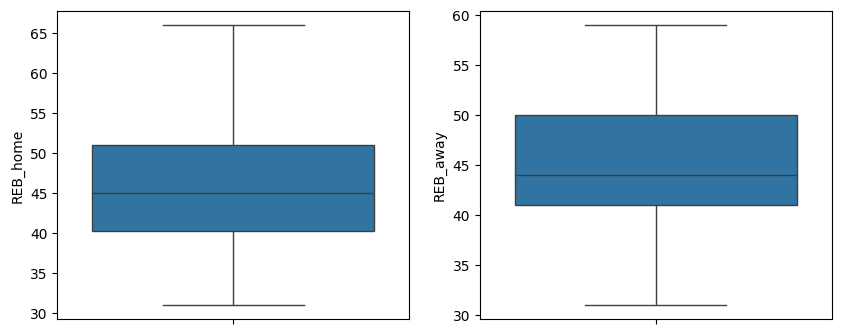

In [65]:
sns.color_palette("coolwarm", as_cmap=True)
fig, axes =plt.subplots(1,2, figsize=(10,4), sharex=True)
sns.boxplot(y="REB_home", data=results_awaydf["TOR"], ax=axes[0])
sns.boxplot(y="REB_away", data=results_awaydf["TOR"], ax=axes[1])

En el siguiente grafico se visualizaran los datos de los puntos anotados por los Lakers durante el partido.

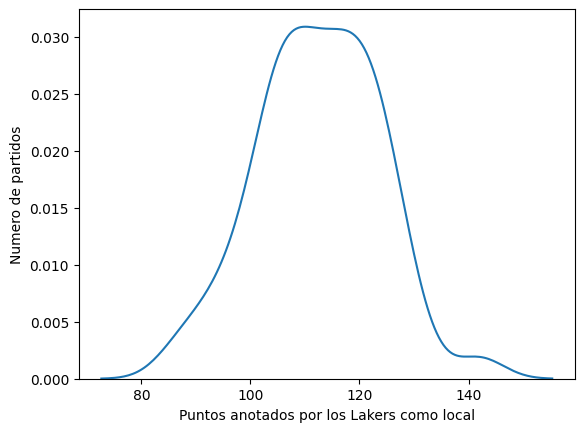

In [66]:
sns.color_palette("coolwarm", as_cmap=True)
sns.kdeplot(results_homedf["LAL"]["PTS_home"])
plt.xlabel("Puntos anotados por los Lakers como local")
plt.ylabel("Numero de partidos")
plt.show()
mean_ptsh = np.mean(results_homedf["LAL"]["PTS_home"])
std_ptsh = np.std(results_homedf["LAL"]["PTS_home"])

En el siguiente grafico se visualizaran los datos de los puntos anotados por los Raptors.

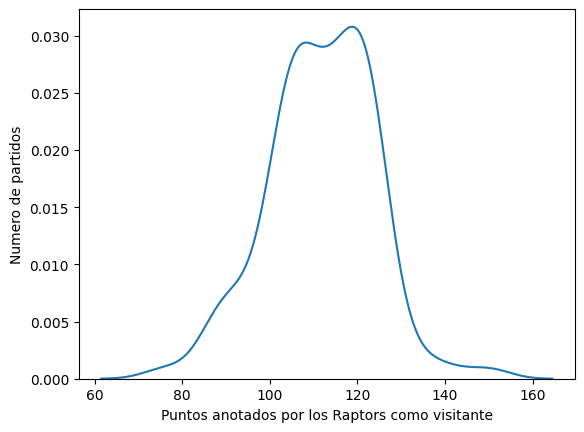

In [67]:
sns.color_palette("coolwarm", as_cmap=True)
sns.kdeplot(results_awaydf["TOR"]["PTS_away"])
plt.xlabel("Puntos anotados por los Raptors como visitante")
plt.ylabel("Numero de partidos")
plt.show()
mean_ptsa = np.mean(results_awaydf["TOR"]["PTS_away"])
std_ptsa = np.std(results_awaydf["TOR"]["PTS_away"])

Se muestra el calculo de los coeficientes de relacion de ambos equipos para asi saber cual ha sido el comportamiento d los datos arrojados por cada anotacion durante el partido.

+ Para hallar estos coeficientes de realcion se usa el metodo .mean de numpy como se hizo en graficas anteriores pero se le pasan por parametro la abreviacion de equipo y los puntos anotados y con el metodo srt se calcula la dispersion de estos datos para poder llegar a una conclusion en esta simulacion.

In [68]:
print(
    "Coeficiente de relacion del equipo local:",
    mean_ptsh,
    "Dispercion puntos equipo local:",
    std_ptsh,
)
print(
    "Coeficiente de relacion del equipo visitante::",
    mean_ptsa,
    "Dispercion puntos equipo visitante:",
    std_ptsa,
)

Coeficiente de relacion del equipo local: 112.4795918367347 Dispercion puntos equipo local: 11.07140976204553
Coeficiente de relacion del equipo visitante:: 111.75510204081633 Dispercion puntos equipo visitante: 11.988141440343005


### _***### Distribucion de puntos de los Laker jugando como local***_

Una vez calculados los coeficientes de relacion y la dispersion de puntos de cada equipo miraremos como se comportan estos datos en un grafico de puntos y as ise podra saber que tan dispersos o no estan los datos en la visualizacion.

la visualizacion que tenga los datos mas dispersos es el equipo que no tendra probabilidad de ganar el encuentro.

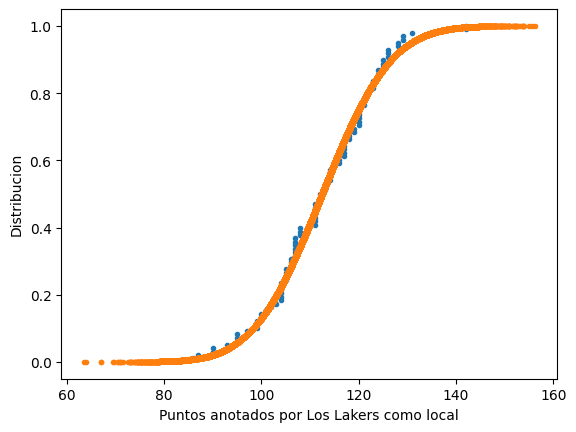

In [69]:
x_ptsh, y_ptsh = distribution(results_homedf["LAL"]["PTS_home"])
x_ptsh1, y_ptsh1 = distribution(np.random.normal(mean_ptsh,std_ptsh,size=100000))
sns.color_palette("coolwarm", as_cmap=True)
plt.plot(x_ptsh,y_ptsh,marker=".",linestyle="none")
plt.plot(x_ptsh1,y_ptsh1,marker=".",linestyle="none")
plt.xlabel("Puntos anotados por Los Lakers como local")
plt.ylabel("Distribucion")
plt.show()

### _***Distribucion de puntos de los Raptors jugando como visitante***_

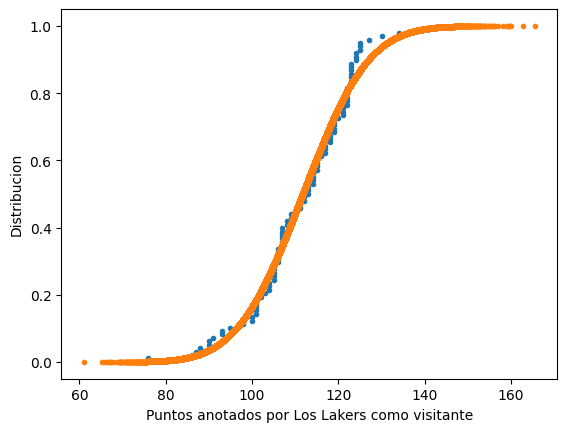

In [70]:
x_ptsa, y_ptsa = distribution(results_awaydf["TOR"]["PTS_away"])
x_ptsa1, y_ptsa1 = distribution(np.random.normal(mean_ptsa,std_ptsa,size=100000))
sns.color_palette("coolwarm", as_cmap=True)
plt.plot(x_ptsa,y_ptsa,marker=".",linestyle="none")
plt.plot(x_ptsa1,y_ptsa1,marker=".",linestyle="none")
plt.xlabel("Puntos anotados por Los Lakers como visitante")
plt.ylabel("Distribucion")
plt.show()

### _***3.1 Simulacion del partido entre Los Lakers y los Raptors***_

Los distribucion de los datos no se superponen perfectamente, pero se puede concluir, basándose tanto en el gráfico como en el análisis de los coeficientes de relacion, que las distribuciones de puntos cuando Los Lakers juegan en casa y Los Raptors juegan de visitante son normales es decir se acercan demaciado a la linea de regresion.

Se usas una distribución normal para simular múltiples juegos cuando Los Lakers es el equipo local y cuanto los Raptors es el equipo visitante, se explorara la probabilidad que tiene cada equipo de ganar el juego.

Los puntos de cada equipo estarán conformados en un 50% por los puntos que anote y en un 50% por los puntos que reciba dada la condición de local o visitante

+ Se crea una variable _***LAL_WINS***_ que me sirve como contador para las iteraciones del ciclo for que me contara cada uno de los puntos anotados por los Lakers.

+ Se crean variables que me serviran para almacenar los datos del coeficiente de ralcion y de la dispercion de los datos de cada uno de los datos que se evaluaran para la simulacion del juego. _***mean_pts_home***_, _***std_pts_home***_, _***mean_pts_home_1***_, _***std_pts_home_1***_, _***mean_assist_home***_, _***std_assist_home***_, _***mean_assist_home_1***_,_***std_assist_home_1***_, _***mean_assist_home***_.

+ Se crean 2 variables que serviran para almacenar el 50% de los datos anotados por los Lakers y los Raptors.

+ Se crea un ciclo for que se encargara de iterar los porcentajes de los puntos anotados por los Lakers, cada vez que los Lakers anoten un punto se almacenara un conteo por cada punto que se anote en la variable LAL_WINS

+ Se hacen las operaciones para calcular el porcentaje de los puntos anotados por los Lakers.

In [71]:
LAL_WINS = 0
mean_pts_home = np.mean(results_homedf["LAL"]["PTS_home"])
std_pts_home = np.std(results_homedf["LAL"]["PTS_home"])
mean_pts_home_1 = np.mean(results_homedf["LAL"]["PTS_away"])
std_pts_home_1 = np.std(results_homedf["LAL"]["PTS_away"])
mean_pts_assist = np.mean(results_awaydf["TOR"]["PTS_away"])
std_pts_assist=np.std(results_awaydf["TOR"]["PTS_away"])
mean_pts_assist_1 = np.mean(results_awaydf["TOR"]["PTS_home"])
std_pts_assist_1=np.std(results_awaydf["TOR"]["PTS_home"])

Points_LAL = (np.random.normal(mean_ptsh,std_ptsh,size=100000)+np.random.normal(mean_pts_home_1,std_pts_home_1,size=100000))/2
Points_TOR = (np.random.normal(mean_ptsa,std_ptsa,size=100000)+np.random.normal(mean_pts_assist_1,std_pts_assist_1,size=100000))/2

for i in range(100000):
    if Points_LAL[i] > Points_TOR[i]:
        LAL_WINS = LAL_WINS + 1
LAL_WINPER = LAL_WINS/100000  
print(LAL_WINPER*100)

53.520999999999994


Una vez se obtiene el resultado de la cantidad de puntos obtenidos por los Lakers se puede deducir que ganaron el partido obteniendo un total de 53.62 lo que equivale a un 53.62% de los puntos del partido.

### _***3.2 Simulacion del partidos de la NBA entre cualquiera de los Equipos***_

Esta funcion recibe como parametros los ID de los Equipos que juegan de local como los que juegan de visitante para asi lograr que haga lo mismo que la funcion anterior, pero en vez de ser un enfrentamiento entre 2 equipos seleccionados, esta funcion sirve para ver el enfrentamiento entre cualquier equipo.

+ Sola basta con poner la abreviacion de los equipos como aparecen en el conjunto de datos  _***gamesim("GSW","MEM")***_

In [72]:
def gamesim(HOMEID,AWAYID):
 H_WINS = 0
 mean_ptsh = np.mean(results_homedf[HOMEID]["PTS_home"])
 std_ptsh = np.std(results_homedf[HOMEID]["PTS_home"])
 mean_ptsh1 = np.mean(results_homedf[HOMEID]["PTS_away"])
 std_ptsh1 = np.std(results_homedf[HOMEID]["PTS_away"])
 mean_ptsa = np.mean(results_awaydf[AWAYID]["PTS_away"])
 std_ptsa=np.std(results_awaydf[AWAYID]["PTS_away"])
 mean_ptsa1 = np.mean(results_awaydf[AWAYID]["PTS_home"])
 std_ptsa1=np.std(results_awaydf[AWAYID]["PTS_home"])

 Points_H = (np.random.normal(mean_ptsh,std_ptsh,size=100000)+np.random.normal(mean_ptsh1,std_ptsh1,size=100000))/2
 Points_A = (np.random.normal(mean_ptsa,std_ptsa,size=100000)+np.random.normal(mean_ptsa1,std_ptsa1,size=100000))/2

 for i in range(100000):
      if Points_H[i] > Points_A[i]:
          H_WINS = H_WINS + 1
 H_WINPER = (H_WINS/100000)*100  
 return H_WINPER


In [73]:
gamesim("LAL","TOR")

53.339999999999996